# Ejercicion de Examen de segunda Instancia - Regresión Logistica



In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/SIS420/Examen')

In [44]:
# se utiliza para el manejo de rutas y directorios.
import os
import math
# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [45]:
# Cargar datos con pandas
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/SIS420/Examen/Datasets/survey lung cancer.csv',sep=',')
data.head(5)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [46]:
#
data = data.iloc[: , 0:16].values

In [47]:
#convertir los datos categóricos a numéricos en específico la columna de GENDER
#Male(M) = Masculino = 1
#female(F) = femenino = 0
from sklearn import preprocessing

le_X = preprocessing.LabelEncoder()
data[: , 0] = le_X.fit_transform(data[:, 0])
print(data)

[[1 69 1 ... 2 2 'YES']
 [1 74 2 ... 2 2 'YES']
 [0 59 1 ... 1 2 'NO']
 ...
 [1 58 2 ... 1 2 'YES']
 [1 67 2 ... 1 2 'YES']
 [1 62 1 ... 2 1 'YES']]


In [48]:
#convertir los datos categóricos a numéricos columna de LUNG_CANCER
#YES = 1
#NO = 0
le_y = preprocessing.LabelEncoder()
data[: , 15] = le_y.fit_transform(data[:, 15])
print(data)

[[1 69 1 ... 2 2 1]
 [1 74 2 ... 2 2 1]
 [0 59 1 ... 1 2 0]
 ...
 [1 58 2 ... 1 2 1]
 [1 67 2 ... 1 2 1]
 [1 62 1 ... 2 1 1]]


In [49]:
#Asignando valores a las características y objetivos(etiquetas) ademas de darle un tipo de dato
X, y = data[:, 0:15], data[:, 15]
X = np.asfarray(X)
y = y.astype(int)

In [50]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
  
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [51]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [52]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = X.shape
# Agraga el termino de intercepción
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X[5])

[ 1.  0. 75.  1.  2.  1.  1.  2.  2.  2.  2.  1.  2.  2.  1.  1.]


In [53]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    
    return J

In [54]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-2.09434114 -0.33757041 -0.0964248  -0.10923492  0.35408049  0.16259927
  0.72210492  0.51922268  0.94404599  1.59118387  0.4903791   1.02730867
  0.97639678 -0.52985999  1.17679329 -0.05921235]

(usando el descenso por el gradiente)


La persona de edad 68 tiene probabilidad de padecer de Cancer pulmonar?: 0.17142158835107188
La persona de edad 68 tiene Cancer pulmonar?: NO



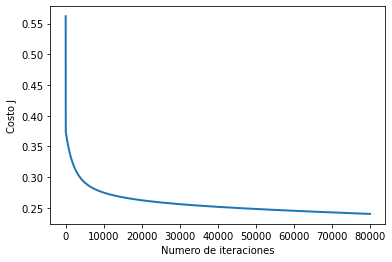

In [55]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 80000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(16)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1,1,84,1,1,1,2,1,1,1,1,2,1,1,1,2]
positivo = sigmoid(np.dot(X_array, theta))
if(positivo == 0.5):
    prueb = math.ceil(positivo)
prueb = round(positivo)
if(prueb==0):
    conf='NO'
else:
    conf='SI'
print("\n(usando el descenso por el gradiente)")
print("\n")
print(f"La persona de edad 68 tiene probabilidad de padecer de Cancer pulmonar?: {positivo}")
print(f"La persona de edad 68 tiene Cancer pulmonar?: {conf}\n")

In [56]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

In [57]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ -0.37378641  -0.20711974 -23.66990291  -0.59385113  -0.61650485
  -0.58414239  -0.59223301  -0.58090615  -0.64886731  -0.63592233
  -0.62297735  -0.62944984  -0.63106796  -0.62297735  -0.59223301
  -0.61326861]
Gradiente en theta inicial (zeros):
	[-0.3738, -0.2071, -23.6699, -0.5939, -0.6165, -0.5841, -0.5922, -0.5809, -0.6489, -0.6359, -0.6230, -0.6294, -0.6311, -0.6230, -0.5922, -0.6133]


In [58]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-24, 0.2, 0.2, 0.1, 0.1, 0.3, -0.1, -0.2, -0.1, 0.1, 0.3, 0.2, 0.1, 0.2, 0.1, 0.1])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*grad))

[-24.    0.2   0.2   0.1   0.1   0.3  -0.1  -0.2  -0.1   0.1   0.3   0.2
   0.1   0.2   0.1   0.1]
Costo en theta prueba: 8.202
Gradiente en theta prueba:
	[-0.874, -0.469, -54.988, -1.375, -1.401, -1.333, -1.343, -1.333, -1.485, -1.414, -1.401, -1.407, -1.420, -1.443, -1.326, -1.391]


In [59]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}


# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))


print('\ntheta:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*theta))


Costo con un valor de theta encontrado por optimize.minimize: 0.149

theta:
	[-30.652, -0.526, 0.022, 1.776, 1.376, 0.887, 1.731, 3.191, 3.070, 1.646, 0.966, 1.410, 3.312, -0.729, 3.122, 0.559]


In [60]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).
    
    X : array_like
        Datos utilizados para el calculo de las predicciones. 
        La fila es el numero de los puntos para calcular las predicciones, 
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X. 
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [61]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1,1,84,1,1,1,2,1,1,2,1,2,1,1,1,2], theta))
print('Para una persona de edad 68 años, se predice una probabilidad de cancer pulmonar de: {:.3f}%'.format(prob*100))


p = predict(theta, X)
print('\Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))

Para una persona de edad 68 años, se predice una probabilidad de cancer pulmonar de: 15.628%
\Precisión de entrenamiento: 94.50 %
